# EDA del dataset Sales Multistore completo preprocesado

## 1. Importación de librerías y de datos

In [2]:
import pandas as pd
import numpy as np
from decimal import Decimal
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from collections import defaultdict
import math
import json


# Date time conversion registration
from pandas.plotting import register_matplotlib_converters

In [3]:
# Configuraciones de Pandas, Numpy, Decimal, etc.

# Pandas
pd.options.mode.chained_assignment = None

# Matplotlib
register_matplotlib_converters()

# Seaborn
sns.set(font_scale=1.5)
# sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'}, font_scale=1.5)
sns.set_style("ticks")

In [4]:
# url = 'https://drive.google.com/file/d/13A7iuecvNDHfKGYAJ7QRB10hyrEi3rFd1/view?usp=sharing'
# Hemos desestimado la descarga desde una URL, dado el tamaño del archivo csv

pd_sales_multistore = pd.read_csv('sales_multistore_10_2019_04_2020.csv',
                    header=0,
                    index_col=0,
                    parse_dates=['event_time'],
                    infer_datetime_format=True
                    )

## 2. Análisis de la estructura

In [5]:
pd_sales_multistore.head(10)

,product_id,category_id,category_code,brand,price,user_id,user_session
event_time,,,,,,,
2019-10-01 00:02:14+00:00,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
2019-10-01 00:04:37+00:00,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2019-10-01 00:07:07+00:00,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
2019-10-01 00:09:26+00:00,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
2019-10-01 00:09:54+00:00,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2019-10-01 00:10:08+00:00,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
2019-10-01 00:10:56+00:00,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0
2019-10-01 00:12:14+00:00,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
2019-10-01 00:14:14+00:00,1004932,2053013555631882655,electronics.smartphone,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562


In [6]:
pd_sales_multistore.shape

(5573718, 7)

In [7]:
pd_sales_multistore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5573718 entries, 2019-10-01 00:02:14+00:00 to 2020-04-30 23:59:36+00:00
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   product_id     int64  
 1   category_id    int64  
 2   category_code  object 
 3   brand          object 
 4   price          float64
 5   user_id        int64  
 6   user_session   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 340.2+ MB


### 2.1 El problema del uso de memoria

El consumo de memoria del dataframe explorado es considerable (ver el resultado de pd.Dataframe.info() arriba). Vamos a analizar el por qué.

In [8]:
pd_sales_multistore.memory_usage(deep=True)

Index             44589744
product_id        44589744
category_id       44589744
category_code    445573336
brand            350437780
price             44589744
user_id           44589744
user_session     518355774
dtype: int64

In [9]:
pd_sales_multistore.memory_usage(deep=True).sum()

1537315610

In [10]:
pd_sales_multistore.dtypes

product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

Las columnas inferidas como dtype *object* son claramente las que consumen más memoria.

Cambio el tipo de datos de algunas columnas. Los tipos de datos más eficiente a efectos de manejo de memoria son los numéricos *int*. Cambio a *int* las columnas que contienen valores numéricos, aunque no voy a hacer operaciones matemáticas con estos valores. Lo lógico sería convertirlas a *string*, pero este tipo de dato consume más memoria.

Veamos los valores máximos de las columnas numéricas:

In [11]:
for column_name in pd_sales_multistore.select_dtypes(include="number"):
    print("'Valor mínimo / máximo de '{}': {} / {}".
          format(column_name, pd_sales_multistore[column_name].min(), pd_sales_multistore[column_name].max()))

'Valor mínimo / máximo de 'product_id': 1000978 / 100232904
'Valor mínimo / máximo de 'category_id': 2053013551857008829 / 2292044075982913587
'Valor mínimo / máximo de 'price': 0.2 / 2574.07
'Valor mínimo / máximo de 'user_id': 101875240 / 649772024


'product_id' y 'user_id' van a ser claramente *int32* y 'category_id' se queda como el tipo de datos inferido, *int64*.
Quiero que 'price' tenga precisión decimal (no de float), pero curiosamente para convertir a este tipo hay que partir de *string*, no de *float* (ver más abajo).

Las variables categóricas son inferidas como tipo *object*, pero el tipo *category* es más eficiente, dependiendo del número de valores distintos (cardinalidad) de la columna.

In [12]:
for column_name in pd_sales_multistore.select_dtypes(exclude="number"):
    print("Cardinalidad de '{}' con respecto al número total de valores: {} %:".
          format(column_name, pd_sales_multistore[column_name].nunique()/pd_sales_multistore[column_name].count()*100))

Cardinalidad de 'category_code' con respecto al número total de valores: 0.002493847015582776 %:
Cardinalidad de 'brand' con respecto al número total de valores: 0.07321863072369288 %:
Cardinalidad de 'user_session' con respecto al número total de valores: 81.53256049193733 %:


'user_session' contiene muchos valores distintos y resulta que es más eficiente convertirlo a *string*. Vamos a aplicar a esta columna y a la columna 'price' el nuevo tipo *Arrow*, que es más eficiente en términos de uso de memoria.

In [13]:
pd_sales_multistore = pd_sales_multistore.astype({"product_id":'int32', "category_id":'int64', \
                                                   "category_code":'category', "brand":'category', \
                                                   "price":'string[pyarrow]', "user_session":'string[pyarrow]'})

In [14]:
pd_sales_multistore.dtypes

product_id          int32
category_id         int64
category_code    category
brand            category
price              string
user_id             int64
user_session       string
dtype: object

In [15]:
pd_sales_multistore.memory_usage(deep=True)

Index             44589744
product_id        22294872
category_id       44589744
category_code     11162694
brand             11540179
price             54279074
user_id           44589744
user_session     222948720
dtype: int64

In [16]:
pd_sales_multistore.memory_usage(deep=True).sum()

455994771

Vemos que convirtiendo de forma estudiada los dtypes de las columnas se pueden obtener unos ahorros de memoria considerables, en este caso

In [17]:
'Ahorro de memoria del {} %'.format((1537315610-455994771)/1537315610*100)

'Ahorro de memoria del 70.33824622388373 %'

### 2.2 Variables numéricas

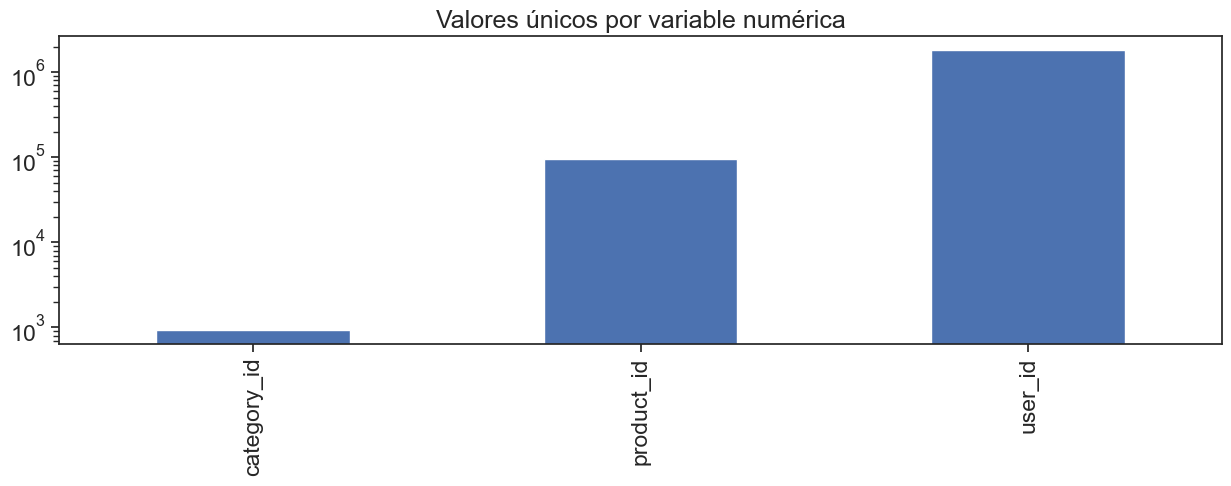

In [18]:
# Valores únicos de cada variable numérica, ordenadas
pd_sales_multistore_unique = pd_sales_multistore.select_dtypes(include="number").nunique().sort_values()

# Ploteo con escala logarítmica en el eje y
pd_sales_multistore_unique.plot.bar(logy=True, figsize=(15, 4), title="Valores únicos por variable numérica")
plt.show()

Todo parece lógico: hay menos categorías (category_id) que productos (product_id) y más usuarios (user_id) que productos y categorías.

Los resultados a presentar a nuestro cliente se van a basar en un estudio de forecasting de múltiples series de tiempos. ¿De cuántas series estamos hablando?

In [19]:
# referencias distintas que aparecen en el dataset
pd_sales_multistore['product_id'].nunique()

96037

Este número tan elevado va a requerir una potencia de computación muy elevada. Hay que evaluar las diferentes estrategias posibles: un *sale forecasting* por referencia de producto o un forecasting conjunto, como el que se aplicó con éxito en una competición de Kaggle (https://www.kaggle.com/c/favorita-grocery-sales-forecasting). Esto se verá más en adelante.

### 2.3 Variables no numéricas

In [20]:
# Valores únicos de cada variable no numérica, ordenadas. 'price' aparece como variable no numérica,
# porque lo he convertido a string como paso previo para convertirlo en decimal.
pd_sales_multistore.describe(exclude="number")

,category_code,brand,price,user_session
count,5573718,5573718,5573718,5573718
unique,139,4081,67748,4544395
top,construction.tools.light,samsung,128.42,12ec3547-84f2-4eab-bd64-725ddc03dd5b
freq,2232975,1527193,28021,387


## 3. Calidad de los datos

Ya hicimos un chequeo de duplicados y *NAs* durante el preprocesamiento. Ahora haremos unas comprobaciones adicionales.

### 3.1 Valores fuera de rango, outliers

#### 3.1.1 Fechas

¿Hay fechas fuera del rango 01/10/2019 de 30/04/2020 que se supone representa el dataset original?

In [21]:
print('Fecha inicial: {}, Fecha final: {}'.format(pd_sales_multistore.index.min(), pd_sales_multistore.index.max()))

Fecha inicial: 2019-10-01 00:02:14+00:00, Fecha final: 2020-04-30 23:59:36+00:00


**No** hay fechas fuera del rango que se supone representa el dataset original.

#### 3.1.2 Precios

Vamos a ver la distribución de los valores de 'price' por medio de un boxplot.

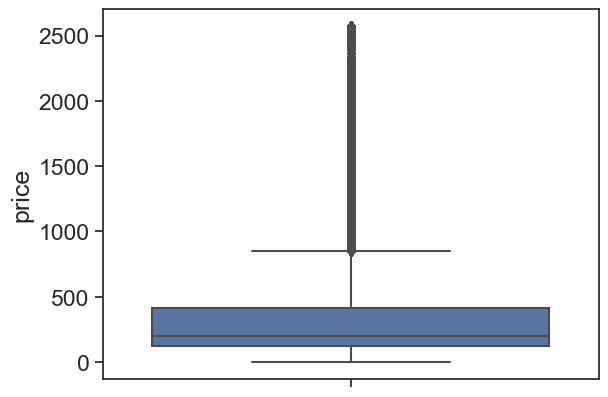

In [22]:
# Convierto los valores de 'price' a float para poder plotearlos
pd_sales_multistore['price'] = pd_sales_multistore['price'].astype('float16')

sns.boxplot(y = 'price', data = pd_sales_multistore)
plt.show()

Apreciamos un gran número de *outliers*. Veamos cuántos son.

In [23]:
Q1 = pd_sales_multistore['price'].quantile(0.25)
Q3 = pd_sales_multistore['price'].quantile(0.75)
IQR = Q3 - Q1
print("Porcentaje de outliers en la columna 'price': {} %"
.format(((((pd_sales_multistore['price'] < (Q1 - 1.5 * IQR)) | (pd_sales_multistore['price'] > (Q3 + 1.5 * IQR))).sum()) / pd_sales_multistore['price'].count() * 100).round(2)))

Porcentaje de outliers en la columna 'price': 10.45 %


Puede parecer un porcentaje muy alto, pero estamos hablando de más de 96.000 referencias distintas, con lo cual este cálculo no es significativo en términos estadísticos, dada además la variabilidad de tipos de producto (se trata de un e-commerce generalista).

#### 3.1.3 Demás columnas del dataframe

Al tratarse de columnas categóricas, no las sometemos al análisis de valores de fuera de rango y outliers.

### 3.2 Evolución de los precios

Otro chequeo que podemos hacer de los precios es si la diferencia entre el valor más alto y el más bajo de un producto dentro del periodo observado se sitúa dentro de unos parámetros *normales*.
Averiguo cuáles son las referencias más vendidas, para utilizar valores representativos

In [27]:
# Convierto los valores de 'price' a decimal para representarlos con mayor fidelidad
pd_sales_multistore['price'] = pd_sales_multistore['price'].astype('string[pyarrow]')
pd_sales_multistore['price'] = pd_sales_multistore['price'].apply(Decimal)
# pd_sales_multistore['price'] = pd_sales_multistore['price'].apply(lambda x: round(x, 2))

In [28]:
print('Precio más bajo: {}, Precio más alto: {}'.format(pd_sales_multistore['price'].min(), pd_sales_multistore['price'].max()))

Precio más bajo: 0.2, Precio más alto: 2574.0


In [29]:
# La referencia '1004767' es de las más vendidas (ver en el apdo. 5.1).
# ¿Cuál es su precio mínimo y máximo dentro de la serie temporal?
print('Precio mínimo: {}'.format(pd_sales_multistore[pd_sales_multistore['product_id'] == 1004767]['price'].min()))
print('Precio máximo: {}'.format(pd_sales_multistore[pd_sales_multistore['product_id'] == 1004767]['price'].max()))

Precio mínimo: 223.9
Precio máximo: 309.0


In [30]:
print('Diferencia entre el precio más alto y el más bajo: {}%'.format( round((Decimal(308.89)-Decimal(223.92))/Decimal(223.92)*100,2)))

Diferencia entre el precio más alto y el más bajo: 37.95%


Es una diferencia considerable. Analizamos la evolución del precio de esta referencia.

Ploteo la evolución del precio de esta referencia. El problema es que no puedo plotear un valor decimal. Tengo que convertirlo nuevamente a float.

In [31]:
pd_sales_multistore_1004767 = pd_sales_multistore[pd_sales_multistore['product_id'] == 1004767]
pd_sales_multistore_1004767['price'] = pd_sales_multistore_1004767['price'].astype(float)

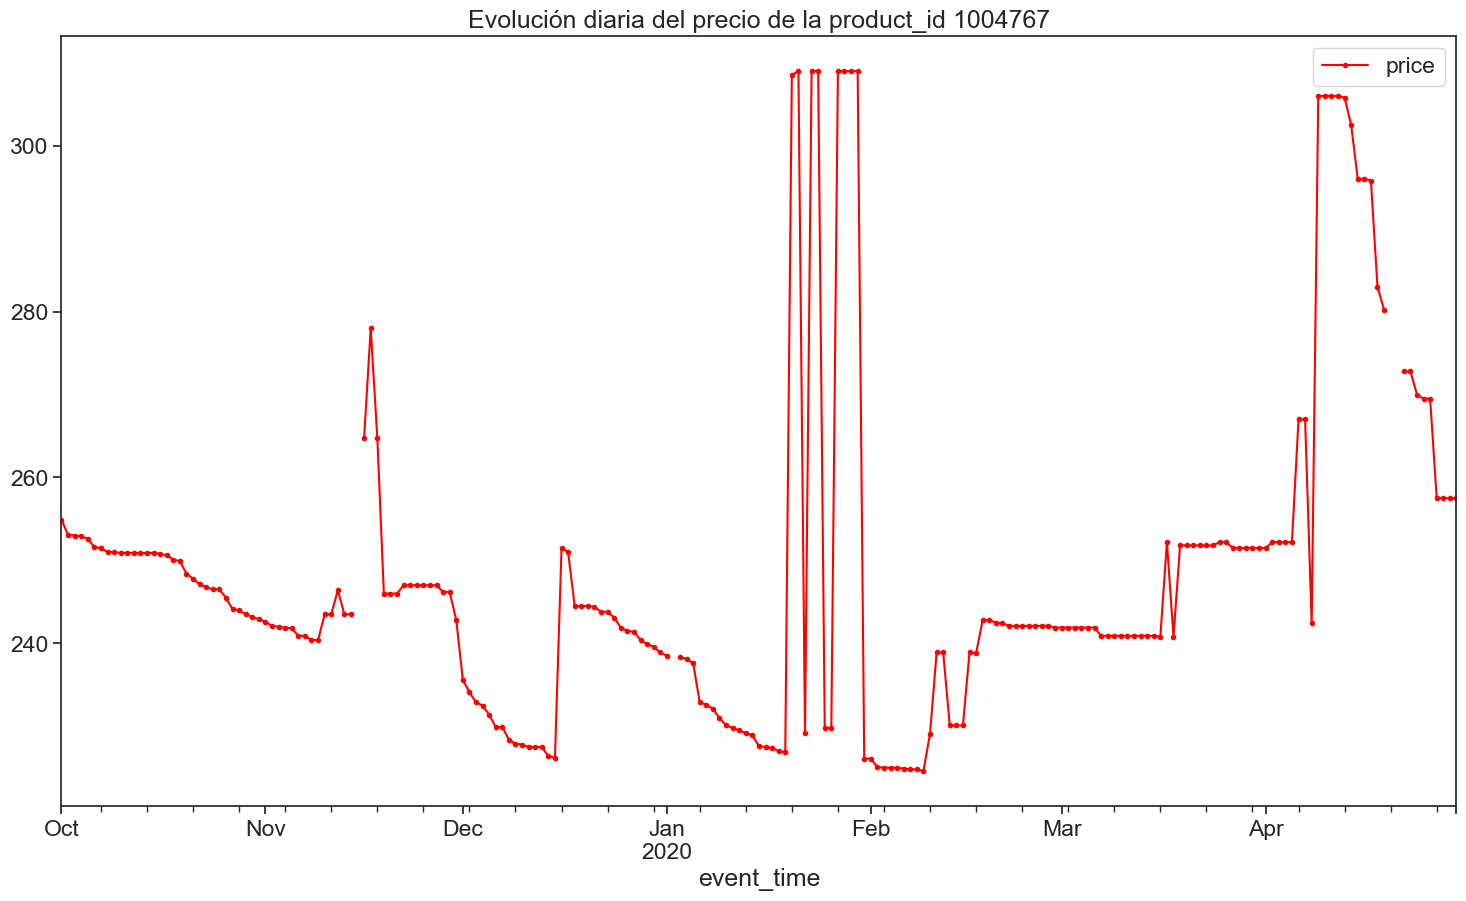

In [32]:
pd_sales_multistore_1004767_plot = pd_sales_multistore_1004767['price'].resample('D').max().to_frame() \
.reset_index()
pd_sales_multistore_1004767_plot.plot(figsize=(18,10), x='event_time', y='price', c='red', marker='.', \
title='Evolución diaria del precio de la product_id 1004767')
plt.show()

Las discontinuidades de la gráfica se deben a que hay días en que no se ha producido venta de la referencia analizada. Pero, aparte de esto, el precio de esta referencia pega unos bandazos enormes. **¿Por qué?**

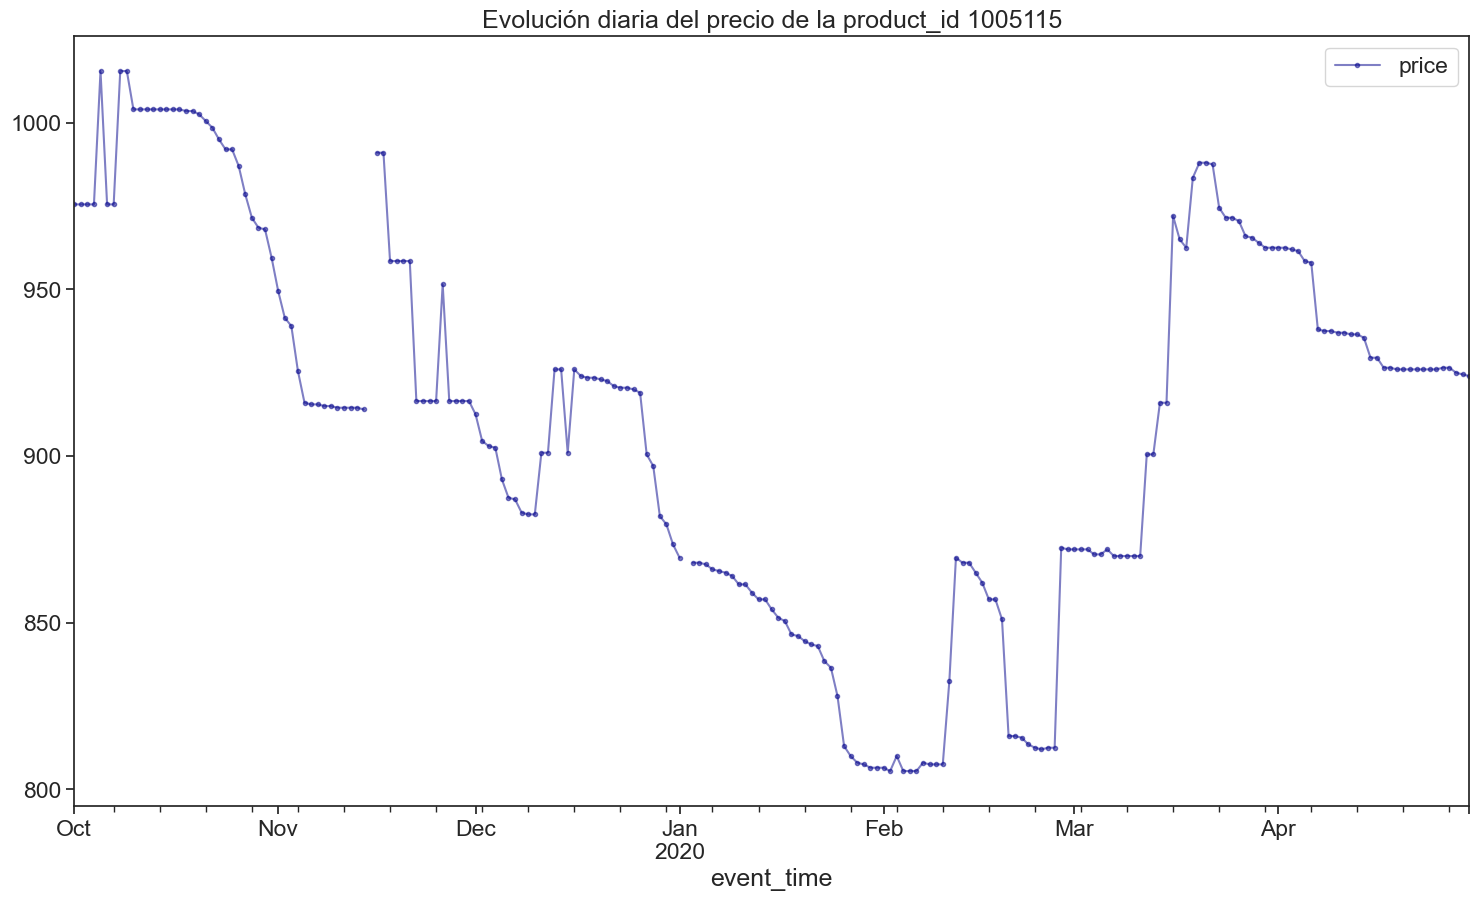

In [33]:
# Otra de las referencias más vendidos: 1005115
pd_sales_multistore_1005115 = pd_sales_multistore[pd_sales_multistore['product_id'] == 1005115]
pd_sales_multistore_1005115['price'] = pd_sales_multistore_1005115['price'].astype(float)
pd_sales_multistore_1005115_plot = pd_sales_multistore_1005115['price'].resample('D').max().to_frame() \
.reset_index()
pd_sales_multistore_1005115_plot.plot(figsize=(18,10), x='event_time', y='price', c='darkblue', alpha=0.5, marker='.', \
title='Evolución diaria del precio de la product_id 1005115')
plt.show()

¡También pega unos bandazos enormes! Vamos a averiguar por qué.

In [34]:
# Trato de averiguar un máximo común divisor de los precios de esta product_id, por si los precios que
# aparecen fueran múltiplos de un precio unitario, con lo cual cambiaría todo el planteamiento del 
# análisis, porque cada entrada del dataframe no se referiría ya a 1 unidad vendida.
np.gcd.reduce(pd_sales_multistore_1005115['price'].astype('int').to_numpy())

1

El MCD es 1, con lo cual NO hay MCD y entiendo que son precios unitarios. En caso de utilizar estos precios
habría que decir qué hacemos con ellos para "estabilizarlos" (aplicar la media o la mediana).

## 4. Parseado de categorías

In [35]:
pd_categories = pd_sales_multistore.drop_duplicates('category_code', keep='first')[['category_code', 'category_id']]
print(pd_categories.shape)
pd_categories.head(10)

(139, 2)


,category_code,category_id
event_time,,
2019-10-01 00:02:14+00:00,electronics.smartphone,2053013555631882655
2019-10-01 00:07:07+00:00,furniture.bathroom.toilet,2053013557418656265
2019-10-01 00:09:26+00:00,electronics.audio.headphone,2053013554658804075
2019-10-01 00:10:56+00:00,appliances.environment.air_heater,2053013552293216471
2019-10-01 02:20:16+00:00,auto.accessories.videoregister,2053013560899928785
2019-10-01 02:22:23+00:00,computers.notebook,2053013558920217191
2019-10-01 02:22:29+00:00,computers.peripherals.printer,2053013552955916539
2019-10-01 02:22:31+00:00,electronics.clocks,2053013553341792533
2019-10-01 02:23:19+00:00,apparel.shoes,2100064855133258156


In [36]:
pd_categories.to_csv('categories.csv')

In [37]:
def crea_dict():
    return defaultdict(crea_dict)

categorias = crea_dict()

def dict_insert(key, value):
    d = categorias

    keys = key.split(".")
    for subkey in keys:
        d = d[subkey]
    d[keys[-1]] = value    

In [38]:
pd_categories.apply(lambda x: dict_insert(x['category_code'], x['category_id']), axis=1)
categorias_json = json.dumps(categorias, indent=4)

# Guardamos el diccionario como JSON para poder utilizarlo posteriormente, p. ej. en Flask
with open('categorias.json', 'w') as outfile:
    outfile.write(categorias_json)

## 5. Diversos rankings generales

### 5.1 Referencias más vendidas

In [39]:
# Dataset ordenado por número de unidades vendidas
pd_sales_multistore[['product_id', 'user_session']].groupby(['product_id']).count(). \
sort_values(by=['user_session'], ascending=False).rename(columns={'user_session': 'units_sold_per_product_id'}).head(10)
# Comando alternativo
# pd_sales_multistore.value_counts(subset=['product_id'])

,units_sold_per_product_id
product_id,
1004767,172598
1005115,154301
1005100,142075
1004856,137999
4804056,119640
1002544,106498
1005212,91083
1005160,69756
1005105,64030


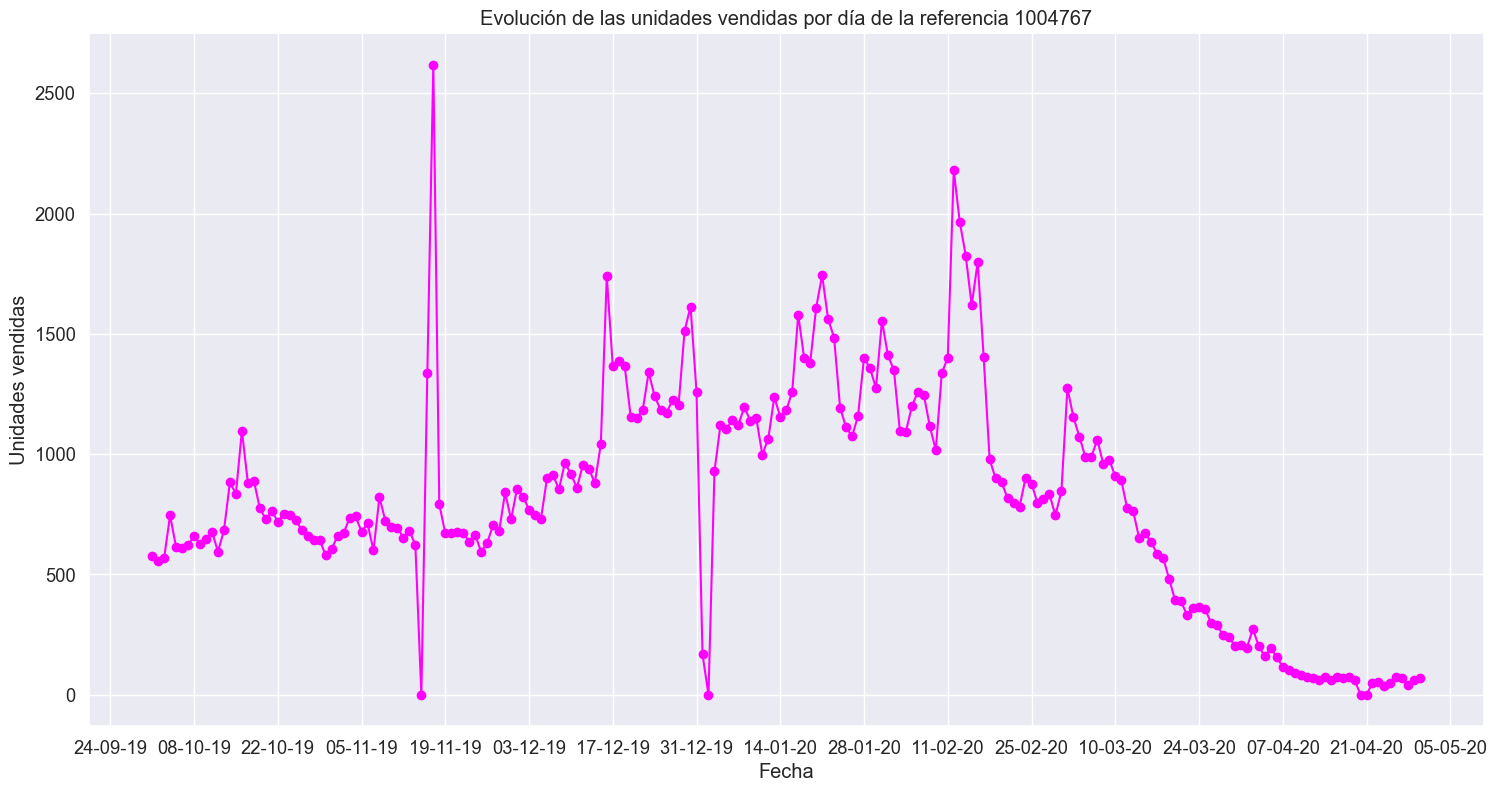

In [40]:
# Evolución de las ventas de una referencia a lo largo del periodo observado
# Referencia n.º 1004767
# pd_sales_multistore_1004767_daily = pd_sales_multistore[pd_sales_multistore['product_id'] == 1004767]['user_session'] \
# .resample('D').count().to_frame()
pd_sales_multistore_1004767_daily = pd_sales_multistore[pd_sales_multistore['product_id'] == 1004767]['user_session']. \
resample('D').count().to_frame().rename(columns={'user_session' : 'units_sold'})


sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(pd_sales_multistore_1004767_daily.index,
        pd_sales_multistore_1004767_daily['units_sold'],
        '-o',
        color='magenta')
ax.set(xlabel="Fecha", ylabel="Unidades vendidas",
       title="Evolución de las unidades vendidas por día de la referencia 1004767")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

plt.show()

Veamos las ventas de la misma referencia comparando entre sí los meses de la serie de tiempos.

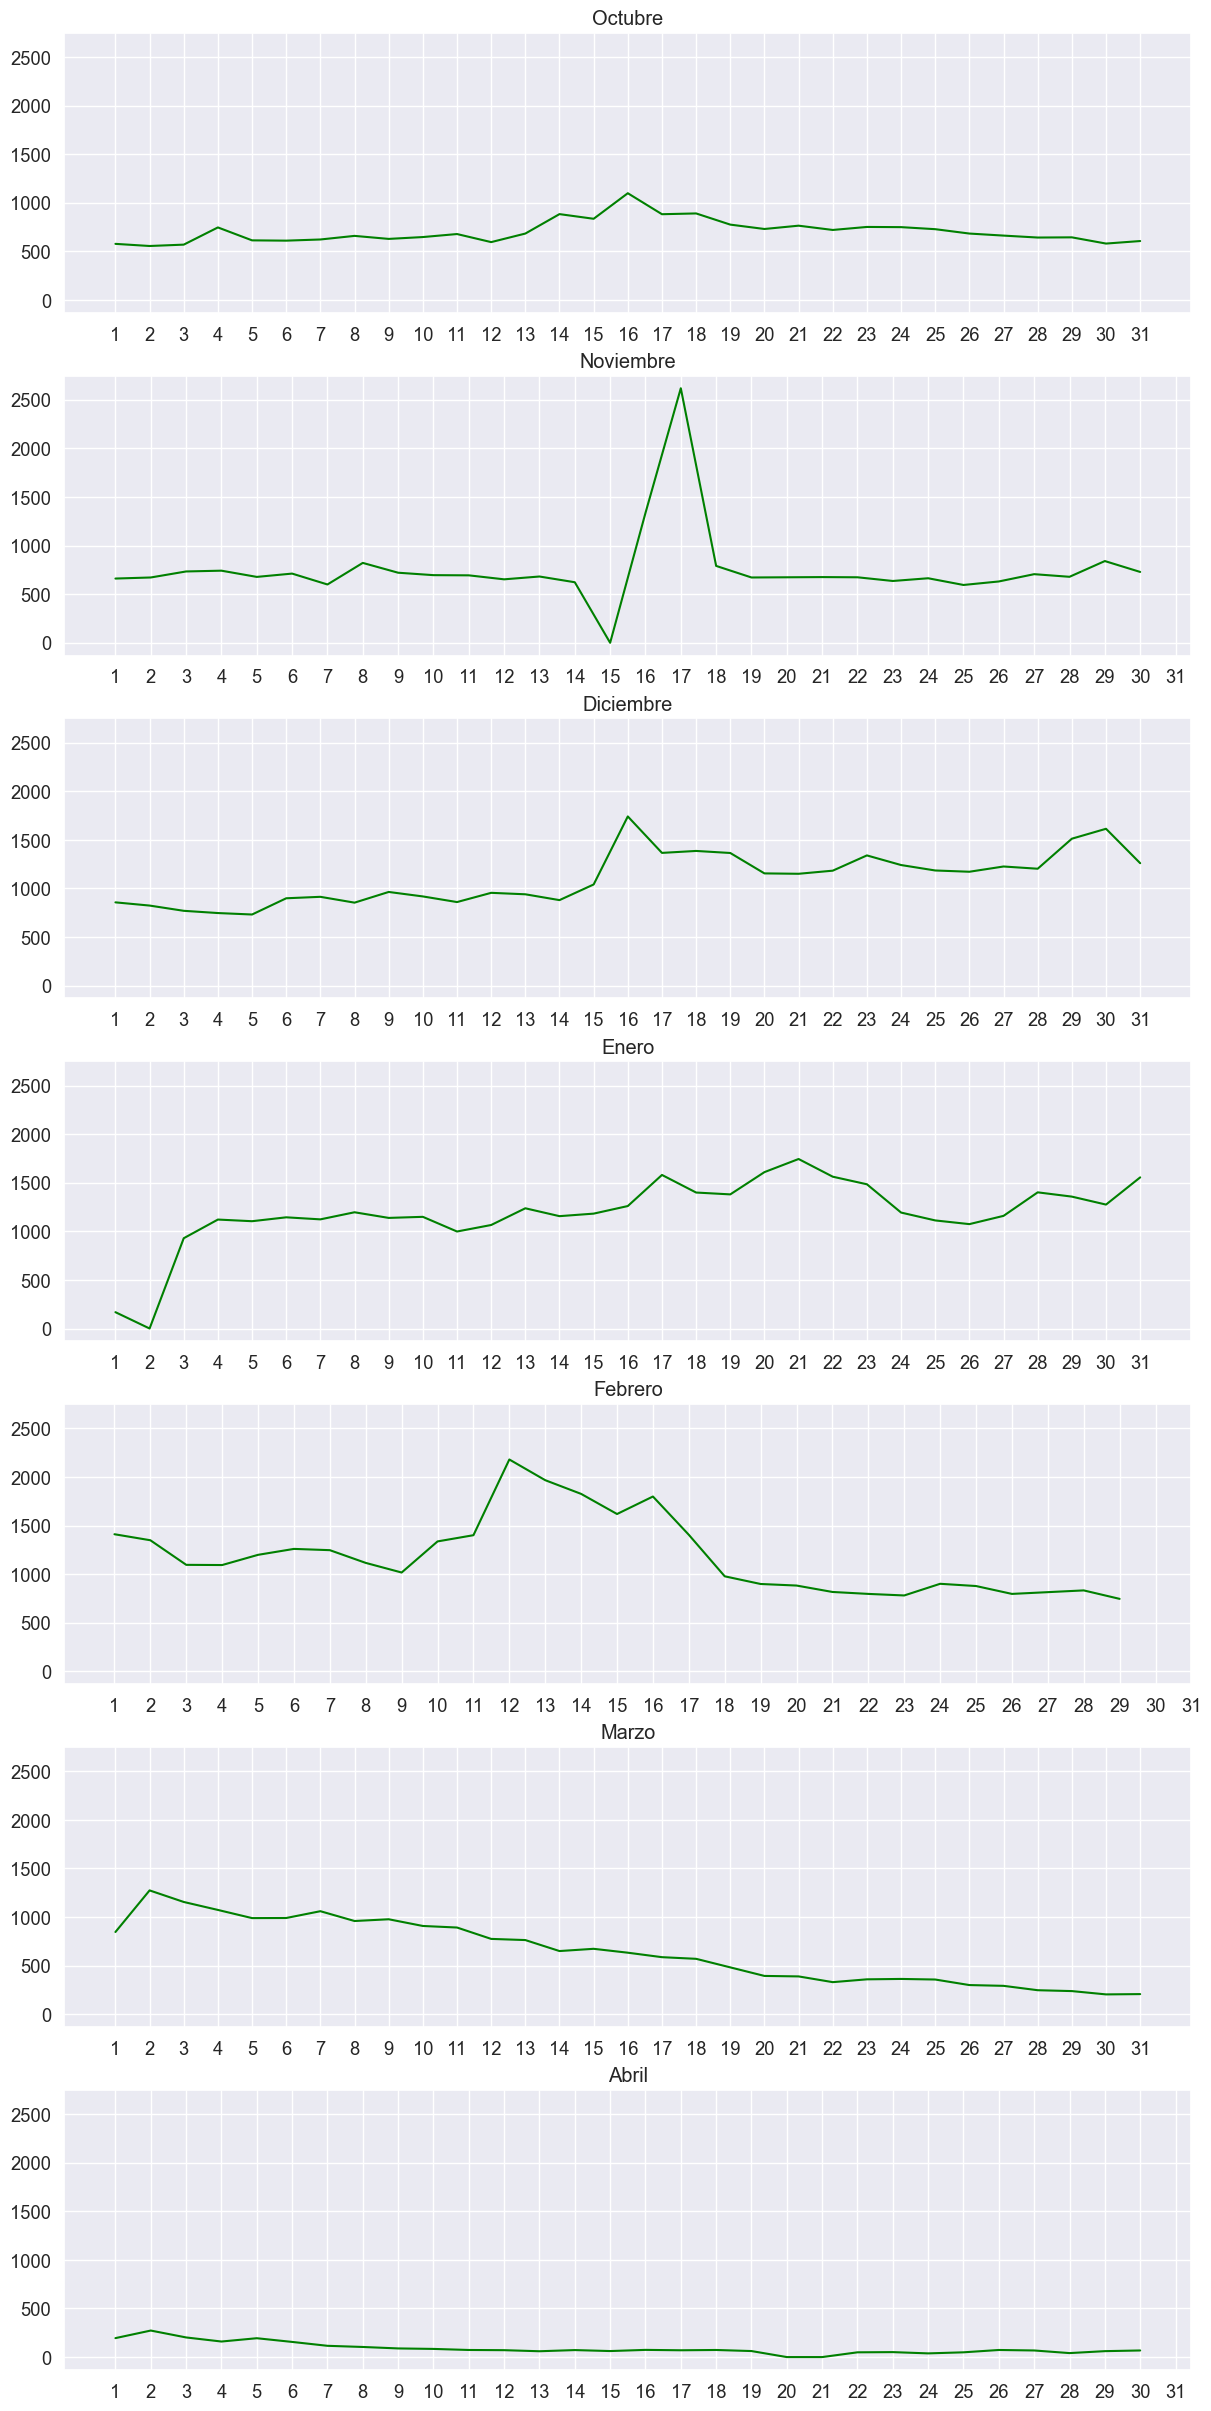

In [41]:
# Evolución de las ventas de una referencia a lo largo del periodo observado
# Referencia n.º 1004767
grupos = pd_sales_multistore_1004767_daily['units_sold'].groupby(pd.Grouper(freq='M'))
meses = pd.DataFrame()
for nombre, grupo in grupos:
    meses[nombre.month] = pd.Series(grupo.values)

# meses = meses.fillna(0)

meses_dict = {'10' : 'Octubre', '11' : 'Noviembre', '12' : 'Diciembre', \
              '1' : 'Enero', '2' : 'Febrero', '3' : 'Marzo', '4' : 'Abril'}

sns.set(font_scale=1.2)

fig, axes = plt.subplots(meses.columns.size, figsize=(12, 24), constrained_layout=True, sharey=True)

for col, ax in zip(meses.columns, axes.flat):
    meses[col].plot.line(ax=ax, color='green', rot=0)
    ax.set_title(meses_dict[str(col)])
    ax.set_xticks(np.arange(meses[col].size))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'{:.0f}'.format(x+1)))

plt.show()
# Los ticks del eje x son mejorables

Se aprecia que en octubre y noviembre de 2019 las ventas de la referencia n.º 1004767 son bastante estables en torno a las 600 unidades diarias, con la salvedad del pico mínimo (0 unidades) y máximo (más de 2500 unidades) casi consecutivos de noviembre. Diciembre de 2019 también es bastante uniforme en cuanto a ventas, cercanas a las 1000 unidades diarias, con una ligera tendencia ascendente durante todo el mes y un pico de ventas el 16 de diciembre. Enero de 2020 ya es bastante más irregular, con un bajón de las ventas el día 2, que luego se recuperan y alcanzan un máximo el día 21, para luego hacer un valle y otro pico hasta el final del mes. Febrero de ese año es un mes de ventas consistentemente altas, sobre todo entre los días 12 y 16, aunque el mes termina algo por debajo de los valores del inicio del mes. En marzo de 2020, tras alcanzarse un pico en torno a las 1300 unidades el día 2, se inicia una tendencia descendente que se prolonga hasta el final del mes. Las bajas ventas se mantienen, si no ya incluso se acentúan, a lo largo de abril de 2020, con varios días de venta 0.

La conclusión es que se pueden fijar unas "temporadas" en cuanto a comportamiento de las ventas. Primero tendríamos una temporada "media", que cubriría desde el 1 de octubre hasta aprox. el 15 de diciembre de 2019. Le seguiría una temporada "alta" que se prolongaría hasta el 2 de marzo de 2020 y concluiríamos la serie de tiempos analizada con una temporada "baja".

### 5.2 Marcas más vendidas

In [41]:
# Dataset ordenado por número de unidades vendidas por marca
pd_sales_multistore[['brand', 'user_session']].groupby(['brand']).count(). \
sort_values(by=['user_session'], ascending=False).rename(columns={'user_session': 'units_sold_per_brand'}).head(10)
# Comando alternativo
# _sales_multistore.value_counts(subset=['brand'])

,units_sold_per_brand
brand,
samsung,1527193
apple,1216172
xiaomi,506110
huawei,221154
oppo,116500
lg,87271
lucente,78721
sony,62378
acer,60265


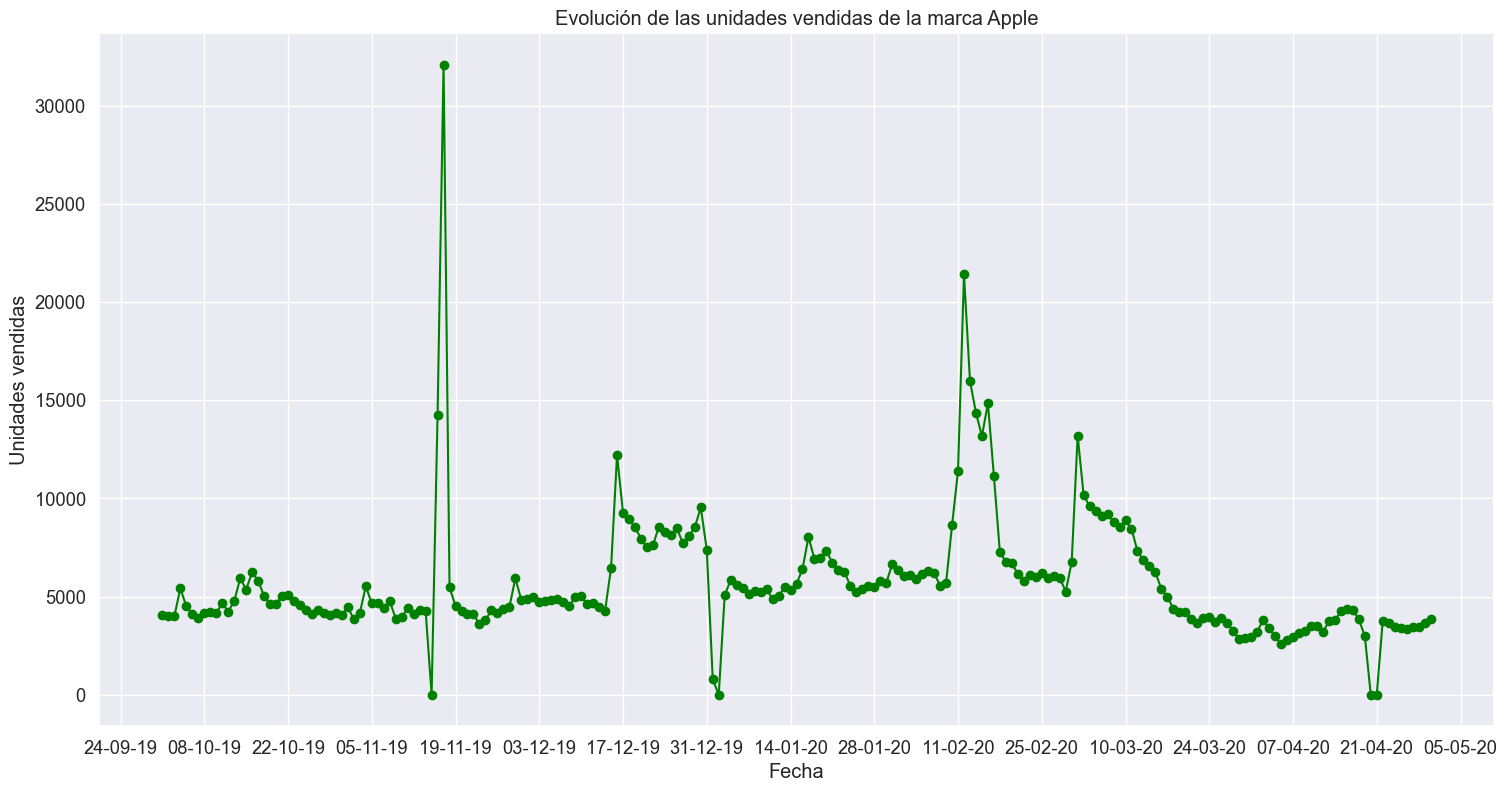

In [43]:
# Evolución de las ventas de una marca a lo largo del periodo observado
# Marca: Apple
pd_sales_multistore_apple = pd_sales_multistore[pd_sales_multistore['brand'] == 'apple']['user_session'] \
.resample('D').count().to_frame().reset_index()

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(pd_sales_multistore_apple['event_time'],
        pd_sales_multistore_apple['user_session'],
        '-o',
        color='green')
ax.set(xlabel="Fecha", ylabel="Unidades vendidas",
       title="Evolución de las unidades vendidas por día de la marca Apple")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

plt.show()

### 5.3 Productos más vendidos, por marca

In [44]:
# Dataset ordenado por número de unidades vendidas por producto y marca marca
pd_sales_multistore[['product_id', 'brand', 'user_session']].groupby(['brand', 'product_id'], observed=True)['user_session'] \
.count().to_frame().sort_values(by=['brand', 'user_session'], ascending=[True, False]).rename(columns={'user_session': 'units_sold_per_prod_id_brand'}).head(100)

units_sold_per_prod_id_brand
brand  product_id                              
a-case 100014125                            332
       100014007                            231
       100118021                            164
       100118024                            134
       18001338                             126
...                                         ...
       18001415                               2
       18001574                               2
       100008067                              2
       100008106                              2
       100011802                              2

[100 rows x 1 columns]

### 5.4 Clientes más compradores (por número de referencias compradas en total)

In [46]:
# Dataset ordenado por número de unidades vendidas por cliente
ps_top_buyers_units = pd_sales_multistore[['user_id', 'user_session']].groupby(['user_id']).count(). \
sort_values(by=['user_session'], ascending=False).rename(columns={'user_session': 'best_buyers_by_units_sold'}).head(10)
# Comando alternativo
# pd_sales_multistore.value_counts(subset=['user_id'])
ps_top_buyers_units

,best_buyers_by_units_sold
user_id,
568782581,1974
549109608,1342
513230794,1340
513320236,1141
598224683,968
563599039,921
553431815,885
566448225,826
628167977,823


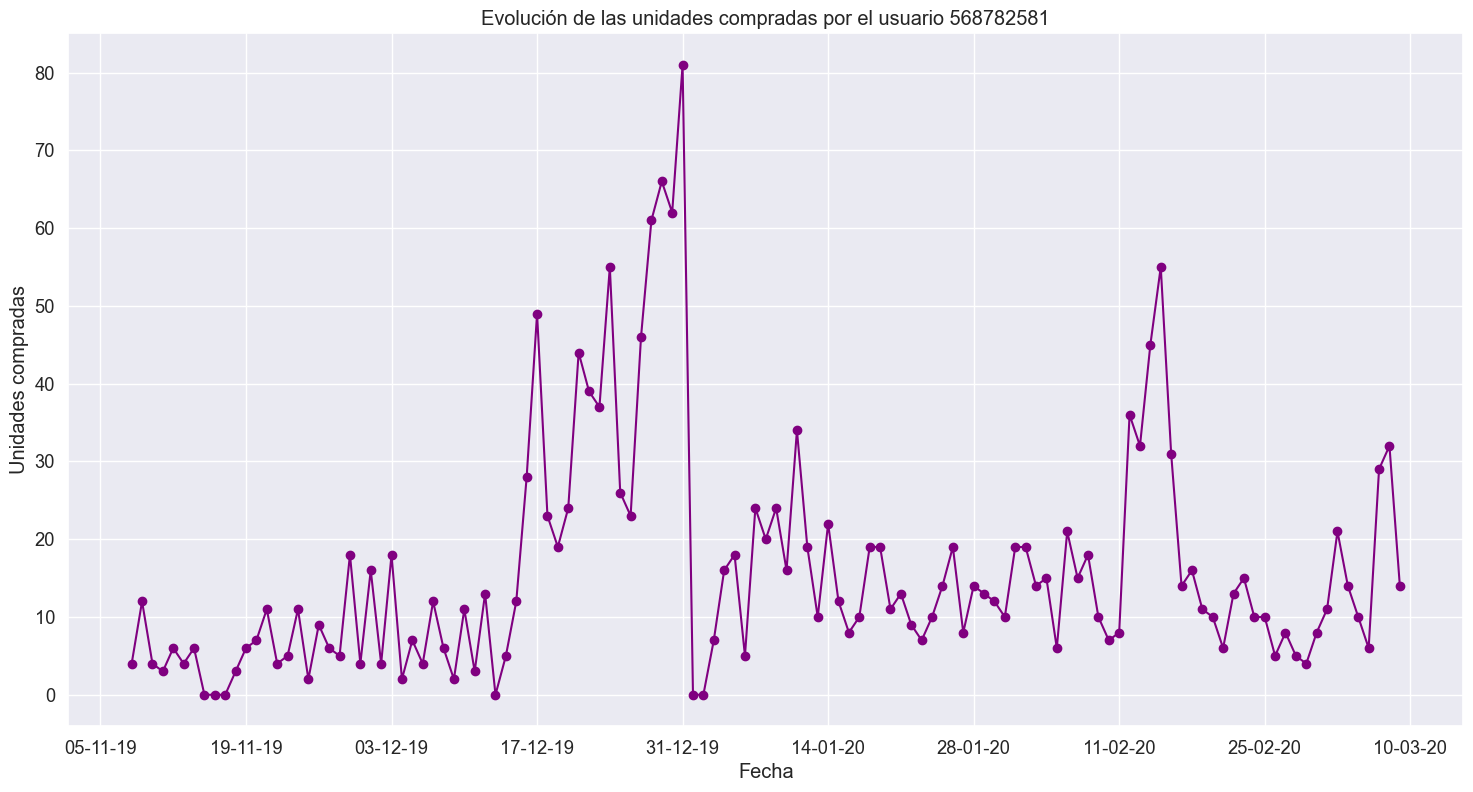

In [48]:
# Evolución de las ventas (por unidades) a los clientes más compradores a lo largo del periodo observado: cliente nº 568782581
pd_sales_multistore_568782581 = pd_sales_multistore[pd_sales_multistore['user_id'] == 568782581]['user_session'] \
.resample('D').count().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(pd_sales_multistore_568782581['event_time'],
        pd_sales_multistore_568782581['user_session'],
        '-o',
        color='purple')
ax.set(xlabel="Fecha", ylabel="Unidades compradas",
       title="Evolución de las unidades compradas por el usuario 568782581")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

plt.show()

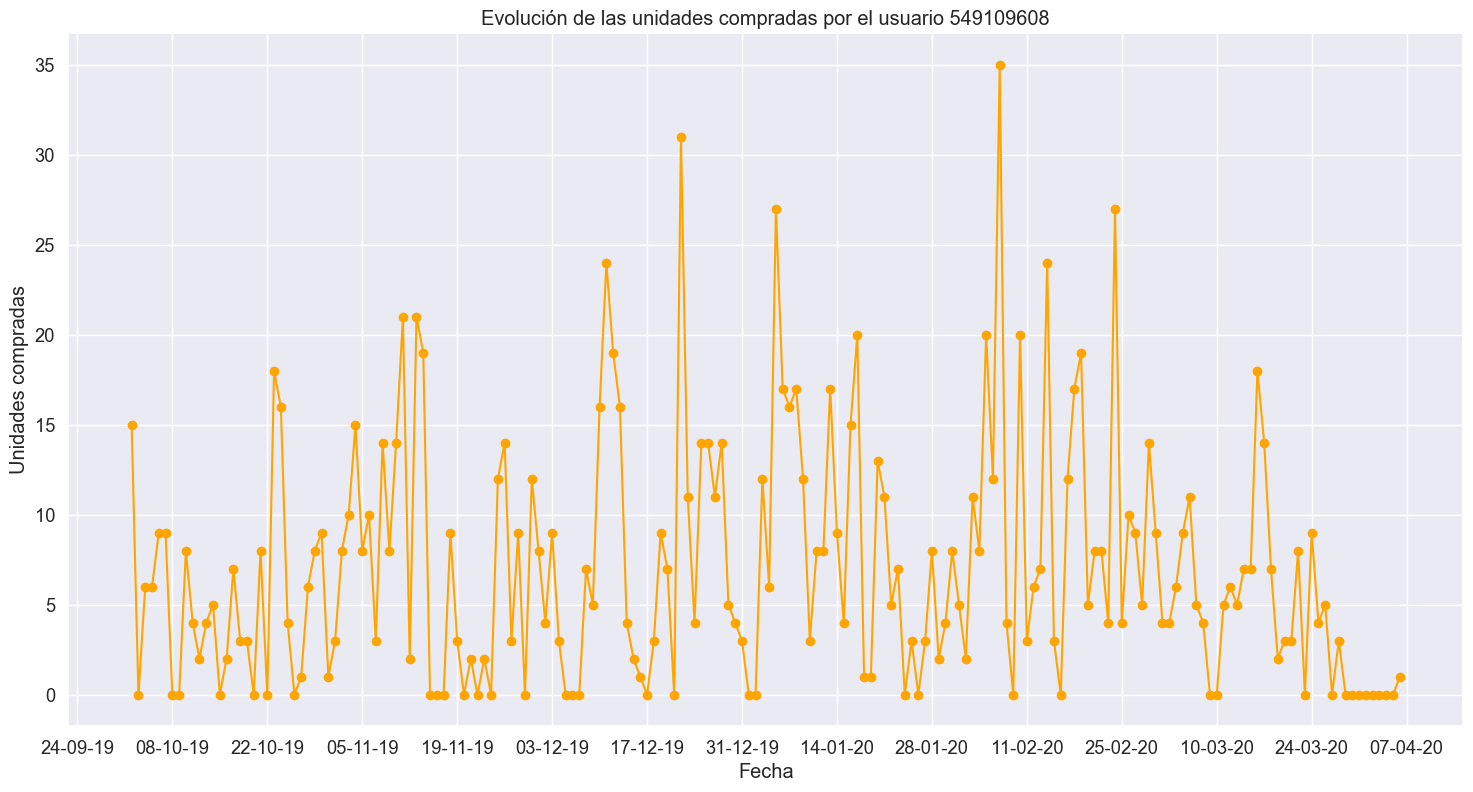

In [49]:
# Evolución de las ventas (por unidades) a los clientes más compradores a lo largo del periodo observado: cliente nº 549109608
pd_sales_multistore_549109608 = pd_sales_multistore[pd_sales_multistore['user_id'] == 549109608]['user_session'] \
.resample('D').count().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(pd_sales_multistore_549109608['event_time'],
        pd_sales_multistore_549109608['user_session'],
        '-o',
        color='orange')
ax.set(xlabel="Fecha", ylabel="Unidades compradas",
       title="Evolución de las unidades compradas por el usuario 549109608")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

plt.show()

### 5.5 Clientes más compradores (por el importe de compra)

In [50]:
# Dataset ordenado por número de unidades vendidas por cliente
pd_sales_multistore[['user_id', 'price']].groupby(['user_id']).sum(). \
sort_values(by=['price'], ascending=False).rename(columns={'price': 'best_buyers_total_sale'}).head(10)
# Comando alternativo
# pd_sales_multistore.value_counts(subset=['user_id'])
# ps_top_buyers_value

,best_buyers_total_sale
user_id,
553431815,788300.96
549109608,727582.69
569333570,675303.50
513230794,631778.46
595104624,601058.2
513320236,559636.95
568782581,513415.49
538216048,496903.56
598224683,484475.29


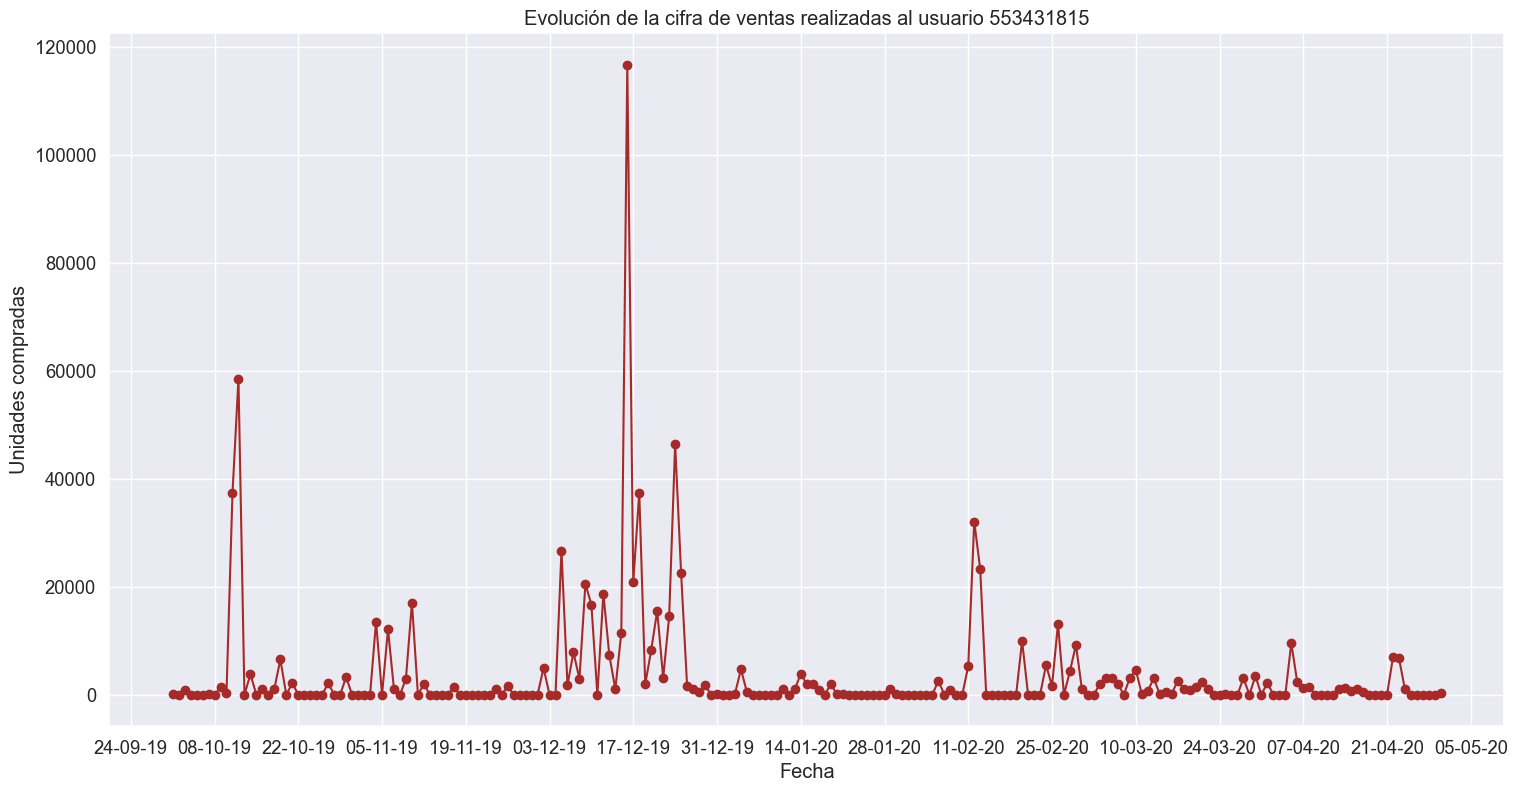

In [52]:
sns.set(font_scale=1.2)
# Evolución de las ventas (por importe) a los clientes más compradores a lo largo del periodo observado: cliente nº 553431815
pd_sales_multistore_553431815 = pd_sales_multistore[pd_sales_multistore['user_id'] == 553431815]['price'] \
.resample('D').sum().astype(float).to_frame().reset_index()

fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(pd_sales_multistore_553431815['event_time'],
        pd_sales_multistore_553431815['price'],
        '-o',
        color='brown')
ax.set(xlabel="Fecha", ylabel="Unidades compradas",
       title="Evolución de la cifra de ventas realizadas al usuario 553431815",)
# fig.set(legend="Importe de venta")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))
plt.show()

### 5.6 Días con más ventas

In [54]:
# Dataset con ventas en unidades agrupadas por día
pd_sales_multistore_total_units = pd_sales_multistore['user_session'].resample('D'). \
count().sort_values(ascending=False).to_frame().rename(columns={'user_session': 'sales_on_a_day'})
pd_sales_multistore_total_units.head(10)

,sales_on_a_day
event_time,
2019-11-17 00:00:00+00:00,134718
2020-02-12 00:00:00+00:00,69357
2020-02-16 00:00:00+00:00,57731
2019-12-16 00:00:00+00:00,55518
2020-02-13 00:00:00+00:00,55500
2019-11-16 00:00:00+00:00,51205
2020-02-14 00:00:00+00:00,50602
2020-02-15 00:00:00+00:00,48278
2020-03-02 00:00:00+00:00,47147


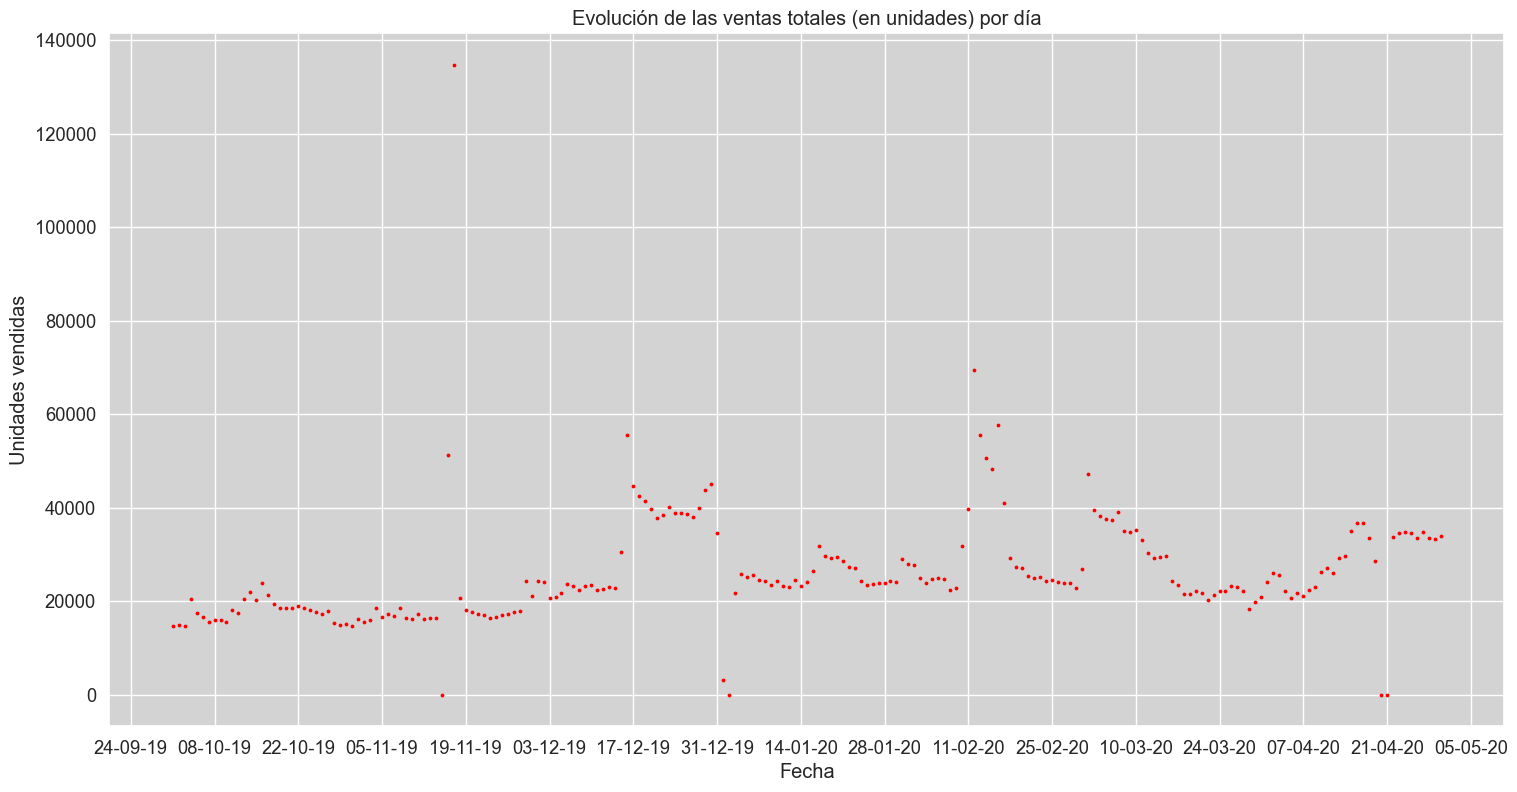

In [55]:
sns.set(rc={'axes.facecolor':'lightgrey'}, font_scale=1.2)

fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(pd_sales_multistore_total_units.index,
        pd_sales_multistore_total_units['sales_on_a_day'],
        s=3,
        marker='o',
        c=['red'])
# plt.yscale('log')
ax.set(xlabel="Fecha", ylabel="Unidades vendidas",
       title="Evolución de las ventas totales (en unidades) por día",)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))
plt.show()

Llama la atención que haya varios días de febrero con máximos de ventas: 12/02/2020, 13/02/2020, 14/02/2020, 15/02/2020, 16/02/2020. He estado investigando en que país podría haber algún tipo de celebración o semana especial de rebajas y lo más cercano que he encontrado es la Fiesta de la Primavera (Año Nuevo) en China.

### 5.7 "Customer behavior"

In [56]:
# Referencias compradas por el cliente más comprador durante una sesión
# Consulto primero la sesión en la que ha comprado más referencias
ps_customer_sales_553431815 = pd_sales_multistore[pd_sales_multistore['user_id'] == 553431815].groupby(['user_session']) \
['user_id'].count().to_frame().sort_values(by=['user_id'], ascending=False) \
.rename(columns={'user_id': 'bought_products'})
# .rename(columns={'user_session': 'best_buyers_per_units_sold'}).head(10)
ps_customer_sales_553431815

,bought_products
user_session,
75afc686-5967-4352-befe-378f7977abf4,46
a504c379-9d7e-40e4-8979-e5ff42251714,27
9474ffd0-a87d-475b-9181-f90d830d4c80,24
c04e8f89-1fa6-4c17-b185-e00e318c2a6f,19
f1a88c8f-bafa-46ba-897f-603f73b4f338,18
...,...
74374ad1-b22d-4660-9f73-0b2e0f8a3811,1
7486e466-8359-4bfe-a699-2e4a609f9695,1
762d75d4-6037-4bfb-becb-f09ac060ba42,1


In [57]:
# Probemos con la sesión n.º '75afc686-5967-4352-befe-378f7977abf4'.
ps_customer_behavior_553431815 = pd_sales_multistore[pd_sales_multistore['user_id'] == 553431815].reset_index()
ps_customer_behavior_553431815[ps_customer_behavior_553431815['user_session'] == '75afc686-5967-4352-befe-378f7977abf4'].sort_values(by='event_time')

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
366,2019-12-16 19:10:19+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
367,2019-12-16 19:11:04+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
368,2019-12-16 19:11:41+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
369,2019-12-16 19:12:28+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
370,2019-12-16 19:13:12+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
371,2019-12-16 19:14:26+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
372,2019-12-16 19:15:01+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
373,2019-12-16 19:15:35+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
374,2019-12-16 19:16:21+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4
375,2019-12-16 19:17:05+00:00,1005107,2232732093077520756,construction.tools.light,apple,1042.0,553431815,75afc686-5967-4352-befe-378f7977abf4


Este ejemplo no permite deducir un patrón de compra del cliente, porque resulta que ha comprado **50 veces** la misma referencia en una misma sesión. Es bastante sospechoso, a menos que no se trate de un gran cliente que realiza compras masivas (algo, por otra parte, extraño en una web de e-commerce minorista).

## 6. Categoría "Smartphones"

In [59]:
df_smartphones = pd_sales_multistore.loc[pd_sales_multistore['category_code'] == 'electronics.smartphone', ['product_id', 'brand', 'price', 'user_id', 'user_session']]

In [60]:
df_smartphones.head(10)

,product_id,brand,price,user_id,user_session
event_time,,,,,
2019-10-01 00:02:14+00:00,1004856,samsung,130.8,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
2019-10-01 00:04:37+00:00,1002532,apple,642.5,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2019-10-01 00:10:08+00:00,1002524,apple,515.5,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
2019-10-01 00:14:14+00:00,1004932,vivo,463.2,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562
2019-10-01 02:19:10+00:00,1004246,apple,736.0,515246296,b7dbae4f-cad3-463e-89ce-41990cf48dea
2019-10-01 02:19:34+00:00,1005104,apple,975.5,555160488,a1395546-c124-456c-9752-0f5cf883c63d
2019-10-01 02:20:33+00:00,1003316,apple,947.0,516198933,e1050ba4-5425-4b8e-9cc8-194878031718
2019-10-01 02:21:02+00:00,1004659,samsung,787.0,555168263,d068d08f-aaf3-4949-b031-cdaf49a5c7cf
2019-10-01 02:22:11+00:00,1004750,samsung,197.4,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291


In [61]:
df_smartphones.shape

(733214, 5)

In [62]:
# Exportamos este dataframe a csv para su uso posterior
df_smartphones.to_csv('sales_multistore_cat-smartphones.csv')

### 6.1 Unidades vendidas de smartphones, por marca y referencia

In [63]:
df_smartphones_brands_products_count = df_smartphones.groupby(['brand', 'product_id'], observed=True)['user_session'] \
.count().to_frame().sort_values(by=['brand', 'user_session'], ascending=[True, False]) \
.rename(columns={'user_session': 'sales'})

In [64]:
df_smartphones_brands_products_count.head(15)

sales
brand  product_id       
a-case 18001428       25
       18001415        2
       18001340        1
       18001378        1
apple  1005115     34785
       1002544     22225
       1004249     17970
       1005105     15776
       1002524     12877
       1002633     10533
       1005135      7502
       1003306      7366
       1005116      7036
       1004258      5422
       1003317      5254

La guardo como csv, porque puede servir para el futuro.

In [65]:
df_smartphones_brands_products_count.to_csv('df_smartphones_brands_products_count.csv')

### 6.2 Lista de marcas (entre otras cosas para utilizarla en Google Trends)

In [66]:
df_smartphones_brands_products_count.index.unique(level='brand')

CategoricalIndex(['a-case', 'apple', 'asus', 'blackberry', 'bq', 'denzel',
                  'deppa', 'doogee', 'fly', 'gionee', 'goodloot', 'google',
                  'haier', 'hiper', 'honor', 'htc', 'huawei', 'inoi', 'irbis',
                  'iwalk', 'jinga', 'karya', 'kisswill', 'lego', 'lenovo',
                  'lg', 'meizu', 'micromax', 'nillkin', 'nokia', 'nubia',
                  'oneplus', 'oppo', 'petek', 'philips', 'prestigio', 'rapid',
                  'samsung', 'sony', 'takeit', 'tecno', 'texet', 'tp-link',
                  'umi', 'vega', 'vertex', 'vivo', 'x-level', 'xiaomi', 'zte'],
                 categories=['a-case', 'a-derma', 'a-elita', 'a-mega', 'a-toys', 'aardwolf', 'abaybooks', 'abc', ...], ordered=False, dtype='category', name='brand')

### 6.3 Evolución de las ventas (por unidades) de una marca concreta

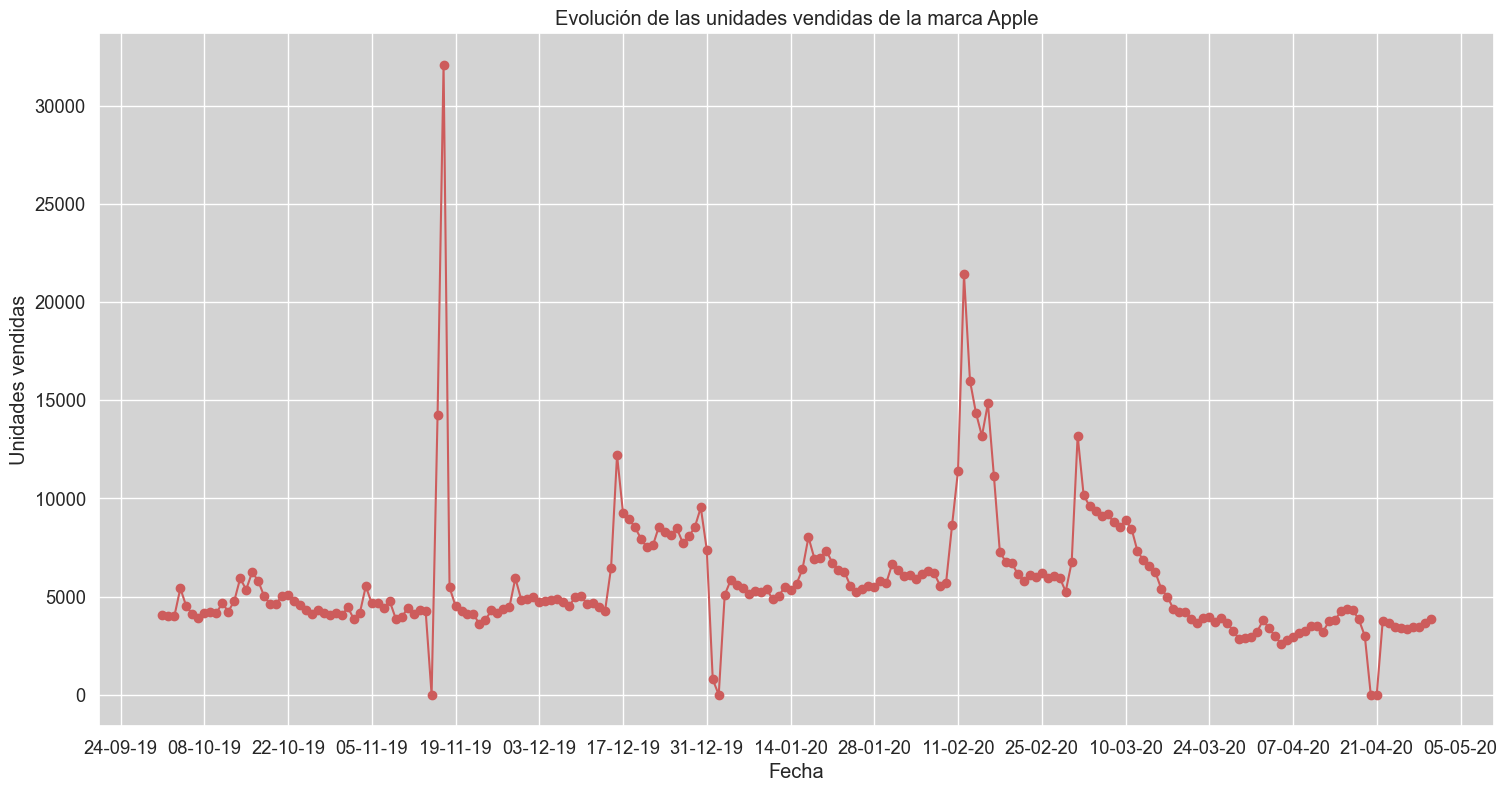

In [67]:
# Evolución de las ventas (por unidades) de una marca concreta a lo largo del periodo observado: marca Apple
pd_sales_multistore_apple = pd_sales_multistore[pd_sales_multistore['brand'] == 'apple']['user_session'] \
.resample('D').count().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(pd_sales_multistore_apple['event_time'],
        pd_sales_multistore_apple['user_session'],
        '-o',
        color='indianred')
ax.set(xlabel="Fecha", ylabel="Unidades vendidas",
       title="Evolución de las unidades vendidas de la marca Apple")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

plt.show()